##**1.Introduction**

We utilize airline passenger satistfaction survey to determine which factors lead to a satisfied, and likewise dissatisfied customer. To predict customer satisfaction, we use five different models, the Random Forest classifier, XG Boost, KNN, Ada Boost, and Gradient Boosting. We employed these methods and compared their accuracy to determine the best fit for prediction.

The Random Forest classifier leverages the power of ensemble learning, combining multiple decision trees with randomization to enhance predictive accuracy, reduce overfitting, and provide a versatile and robust machine learning model. Gradient Boosting is a versatile and powerful ensemble learning technique that builds an additive model by sequentially improving upon the errors of the previous models. It is widely used for regression and classification tasks due to its robustness and high predictive accuracy. Similarly to Gradient Boosting, XG Boost, short for eXtreme Gradient Boosting,  is a gradient boosting algorithm that excels in predictive accuracy, speed, and efficiency. It incorporates regularization techniques, parallel processing, and feature importance analysis to create a strong ensemble of decision trees for various machine learning tasks.

KNN, K-Nearest Neighbors, is a simple and versatile algorithm that relies on the similarity of data points for making predictions. It is easy to understand and implement, making it a good choice for certain types of datasets, especially when the underlying structure is locally clustered. However, it may have limitations in high-dimensional spaces and can be computationally expensive during prediction. AdaBoost, Adaptive Boosting, is an ensemble learning algorithm that sequentially combines the predictions of weak learners, with a focus on instances that are challenging to classify. Its adaptability, resistance to overfitting, and ability to work with various weak learners make it a powerful tool in machine learning.

## **2.Data and Packages Importing**

This dataset from Kaggle is with the scope of US airlines has 22 independent variables, and our dependent variable, satisfaction level, with factor levels satisfied, neutral or dissatisfied. From our variables, we have 21 discrete variables and 2 continuous variables, and these variables scale from passenger information such as age and gender, to the amenities provided by the aircraft, like inflight entertainment, cleanliness, and leg room service. The data also has variables in relation to the airport's services, like departure delay and gate location to name a couple. For the discrete variables, we encoded them to become a binary variable, such as if they are a Loyal Customer would be 1 vs. a disloyal customer being 0.

For reference, [linked](https://www.kaggle.com/datasets/teejmahal20/airline-passenger-satisfaction/) is the Kaggle page from where we source our data.

In [54]:
!pip install opendatasets

In [55]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
import xgboost as xgb
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import warnings
warnings.filterwarnings("ignore")
import opendatasets as od
od.download("https://www.kaggle.com/datasets/teejmahal20/airline-passenger-satisfaction/")

Skipping, found downloaded files in "./airline-passenger-satisfaction" (use force=True to force download)


## **3.Data Cleaning and Wrangling**

### **3.1 Loading the data into the data frame**

We clean the data separately from the train and test data, removing any missing values and changing the character variables into binary variables.

In [56]:
train = pd.read_csv('airline-passenger-satisfaction/train.csv')
test = pd.read_csv('airline-passenger-satisfaction/test.csv')

In [57]:
train.head(5)

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [58]:
test.head(5)

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied


### **3.2 Checking the types of data**

We review the datatypes of all the variables, along with the shape of the data.

In [59]:
# We can remove the first two columns from train and test data
train = train.drop(['Unnamed: 0', 'id'], axis = 1)
test = test.drop(['Unnamed: 0', 'id'], axis = 1)
train.dtypes

Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure Delay in Minutes             int64
Arrival Delay in Minutes             float64
satisfacti

In [60]:
train.shape, test.shape

((103904, 23), (25976, 23))

## **4.Exploratory data analysis**

### **4.1 Variable Plots**

We plot the different features against one another (scatter), against frequency (histogram) to analyze the spread and frequency of the data.

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Flight Distance'}>,
        <Axes: title={'center': 'Inflight wifi service'}>,
        <Axes: title={'center': 'Departure/Arrival time convenient'}>],
       [<Axes: title={'center': 'Ease of Online booking'}>,
        <Axes: title={'center': 'Gate location'}>,
        <Axes: title={'center': 'Food and drink'}>,
        <Axes: title={'center': 'Online boarding'}>],
       [<Axes: title={'center': 'Seat comfort'}>,
        <Axes: title={'center': 'Inflight entertainment'}>,
        <Axes: title={'center': 'On-board service'}>,
        <Axes: title={'center': 'Leg room service'}>],
       [<Axes: title={'center': 'Baggage handling'}>,
        <Axes: title={'center': 'Checkin service'}>,
        <Axes: title={'center': 'Inflight service'}>,
        <Axes: title={'center': 'Cleanliness'}>],
       [<Axes: title={'center': 'Departure Delay in Minutes'}>,
        <Axes: title={'center': 'Arrival Delay in Minutes'}>, <A

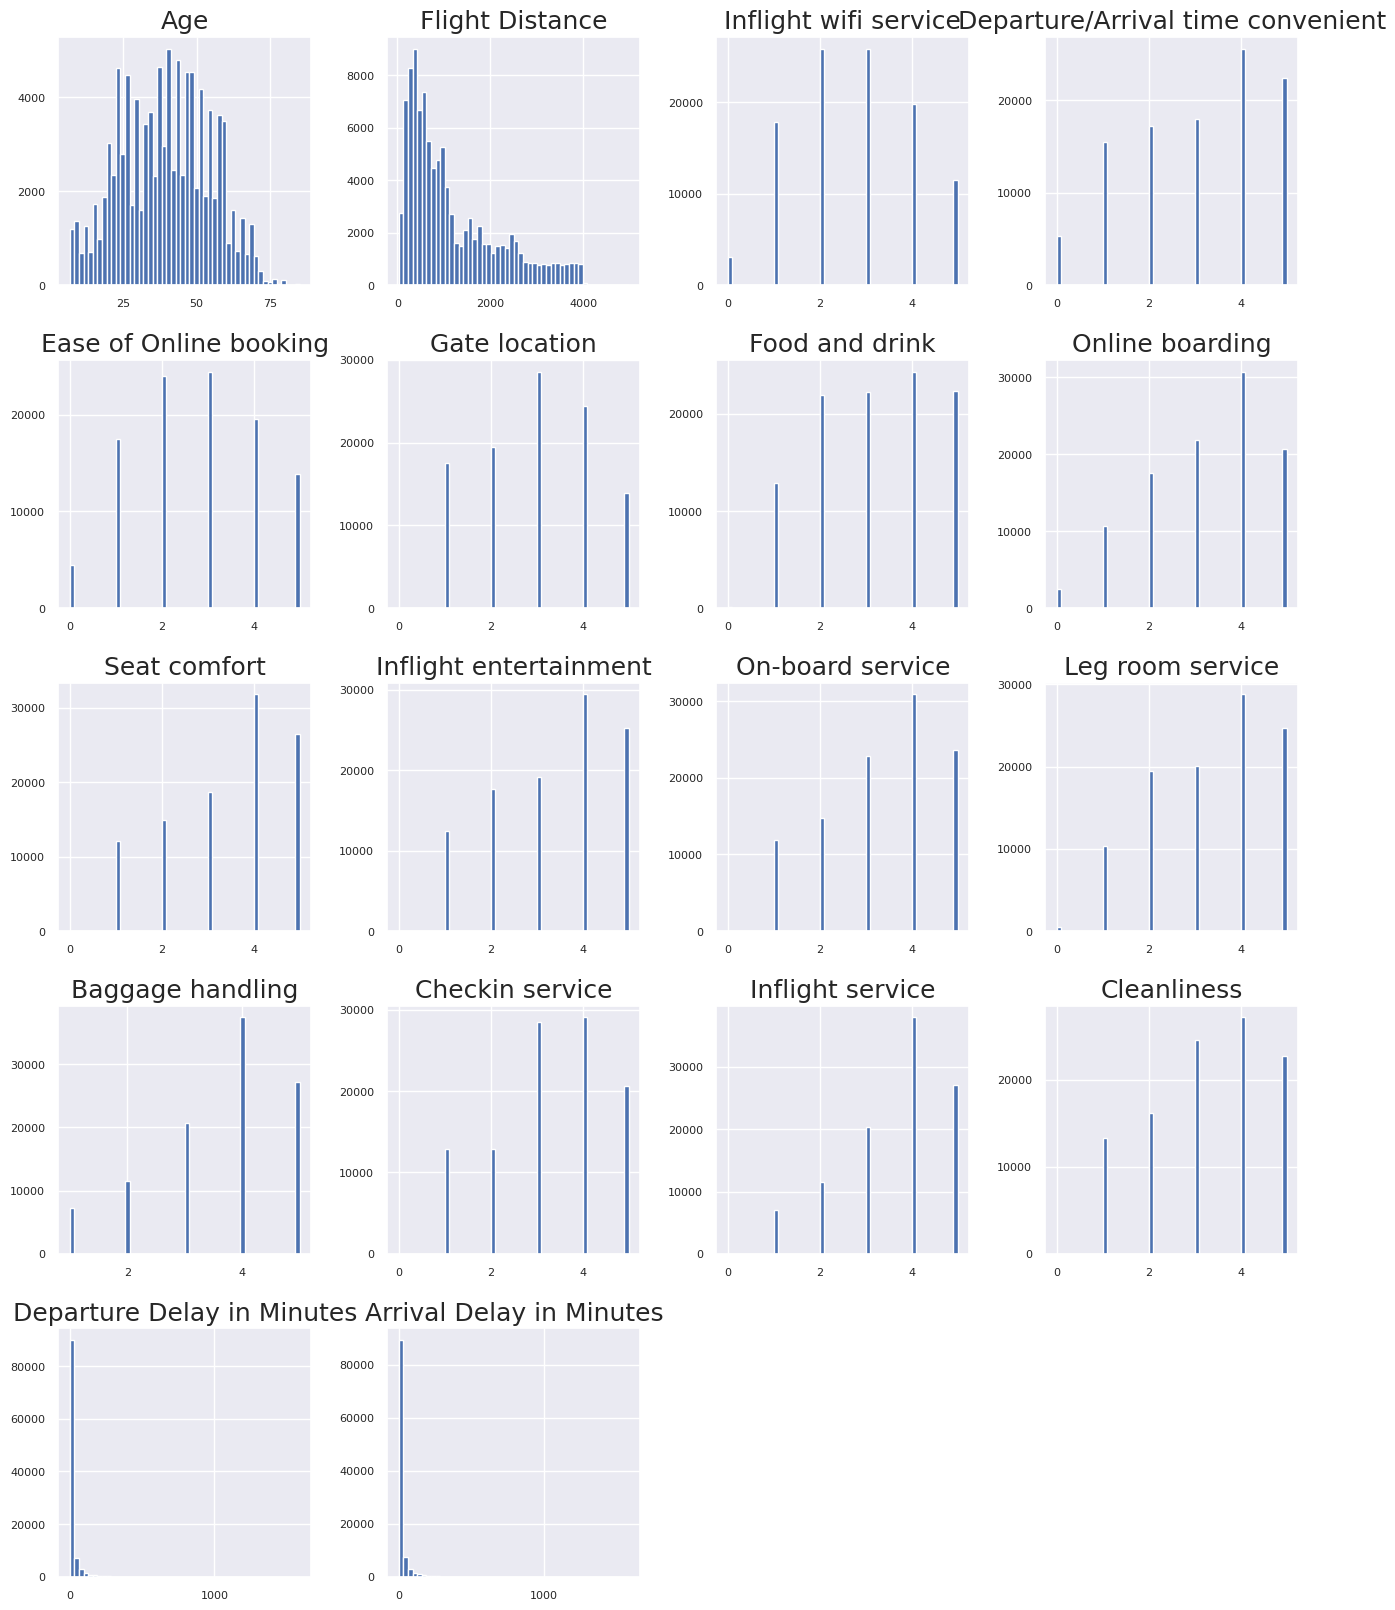

In [61]:
# Distribution of each variable
train.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

### **4.2 Violin Plot for numerical variables**

We conduct a violin plot, which combines elements of a box plot with a kernel density plot. It is used to represent the distribution of a dataset and provides insights into its probability density.

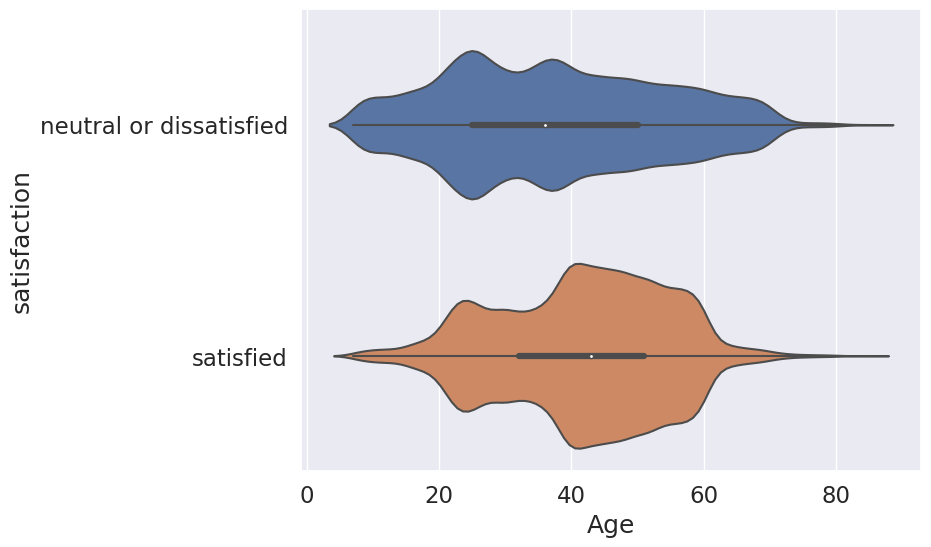

In [62]:
fig = plt.gcf()
fig.set_size_inches(8,6)
__ = sns.violinplot(x='Age', y='satisfaction',data=train, size = 15)

It is important to note that while young children such as Age Groups 7-15 years may not have filled these survey themselves, and would be filled by their guardians or parents, there may be possibility of error.

- The number of dissatisfied/neutral passengers is higher for Age Groups 7 to 40 and  60 to 80 in comparison to the number of satisfied passengers as visible from higher peak attained in the former category. Whereas the number of satisfied passengers are greater for the Age Group 40-60 as seen from smaller peak in this region.
- We also notice the mean for dissatisfied/neutral passengers (noted at Age ~ 32-35) is lower than the satisfied passenger category (noted at Age ~ 45).
- We observe similar violin lengths between the ages of 7 and 70, indicating no significant overall trend in user satisfaction within this age range. However, beyond the age of 70, the violin becomes longer with a thinner body, suggesting a potential increase in variability in user satisfaction within this age group.
- Specifically, among users aged over 70, there appears to be a subset with higher satisfaction and another subset with lower satisfaction. This variation could be attributed to individual preferences, diverse needs, or other factors among the elderly population. Therefore, when designing products or services tailored to different age groups, it may be necessary to consider the specific needs of these diverse user segments.

Furthermore, the violin plot assists in identifying the overall shape of the distribution and detecting the presence of outliers. In this plot, no distinct outliers are apparent, and the distribution appears relatively smooth.

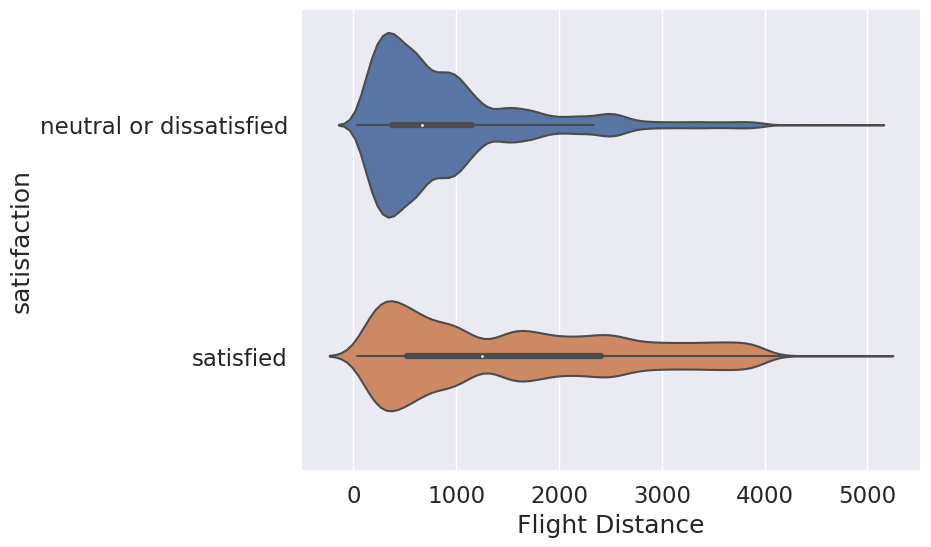

In [63]:
fig = plt.gcf()
fig.set_size_inches(8,6)
__ = sns.violinplot(x='Flight Distance', y='satisfaction',data=train, size = 15)

- For passengers who are "satisfied" (represented in orange), there appears to be a positive correlation between the flight distance and their satisfaction,
suggesting that satisfaction levels tend to increase with longer flights. The distribution is broader across longer distances, indicating a wide variation in satisfaction levels on longer flights.

- On the other hand, the distribution for "neutral or dissatisfied" passengers (in blue) shows a pronounced peak at shorter flight distances, suggesting that passengers are more likely to report neutrality or dissatisfaction on shorter flights. There is a notable decrease in this sentiment as the flight distance increases.

- There is some overlap in the middle range of flight distances for both distributions, suggesting that at these distances, satisfaction levels may be influenced by factors other than just the flight distance.

- Additionally, the width of the violins indicates that the distribution of "neutral or dissatisfied" passengers is more concentrated on shorter flights, while the distribution of satisfied passengers is relatively more dispersed across all flight distances, which might indicate that the relationship between satisfaction and flight distance is not as straightforward or could be influenced by other factors not displayed here.

### **4.3 Feature trends**

Now we're seeing how some features are related to each other, and try to understand human psychology behind these statistics.

Text(0.5, 1.0, 'Flight Distance & Class')

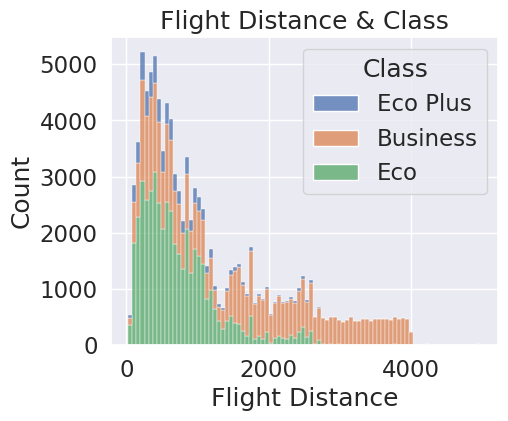

In [64]:
plt.figure(figsize=(5, 4))
ax = sns.histplot(train, x = "Flight Distance", hue = "Class", multiple = "stack")
ax.set_title('Flight Distance & Class')

From the above histogram, we can see that people prefer flying Business Class when the flight distance is long, and for a much shorter flight distance majority flies Economy Class.

<Figure size 500x400 with 0 Axes>

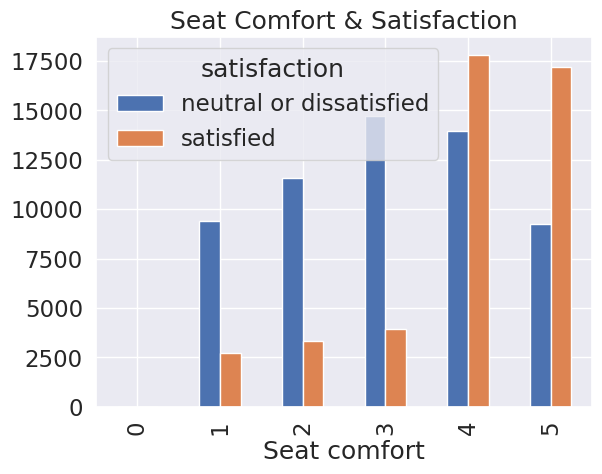

In [65]:
plt.figure(figsize=(5, 4))
ax1 = train.groupby(['satisfaction','Seat comfort'])['satisfaction'].count().unstack(0).plot.bar(title="Seat Comfort & Satisfaction")

From the above barplot, we can see that most people are dissatisfied/neutral when the seats are uncomfortable, which is obvious since everyone loves flying while being comfortable. So as the seat comfort increases from 1 to 5 (highest), the proportion of satisfied customer also increases.

A similar trend has also been observed when it comes to the following features affecting the satisfaction levels of passengers:
1. Food services in flight
2. Cleanliness maintained
3. Ease of Online Bookings
4. In-flight entertainments
5. Leg room availability
6. Online Boardings

<Figure size 500x400 with 0 Axes>

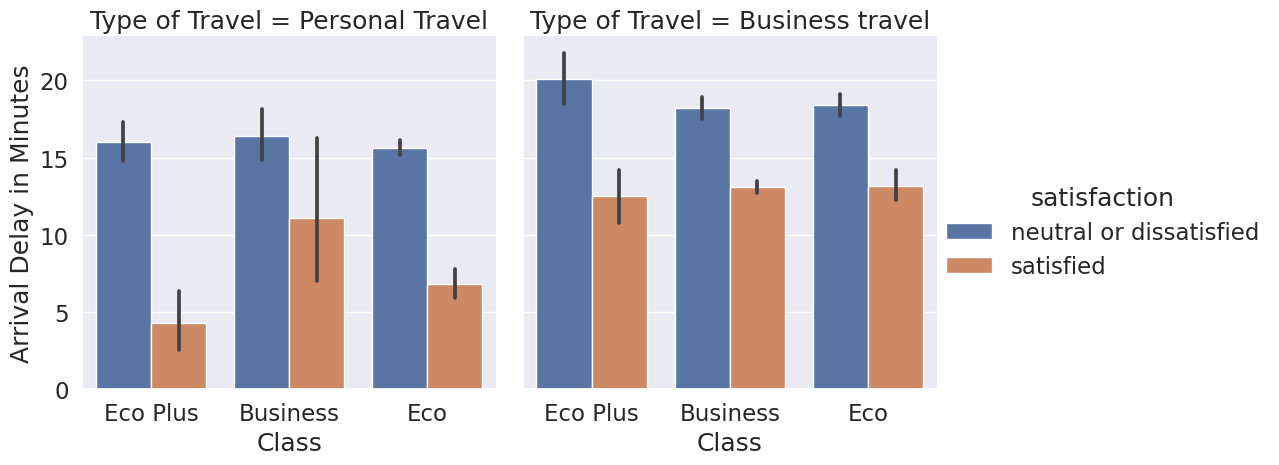

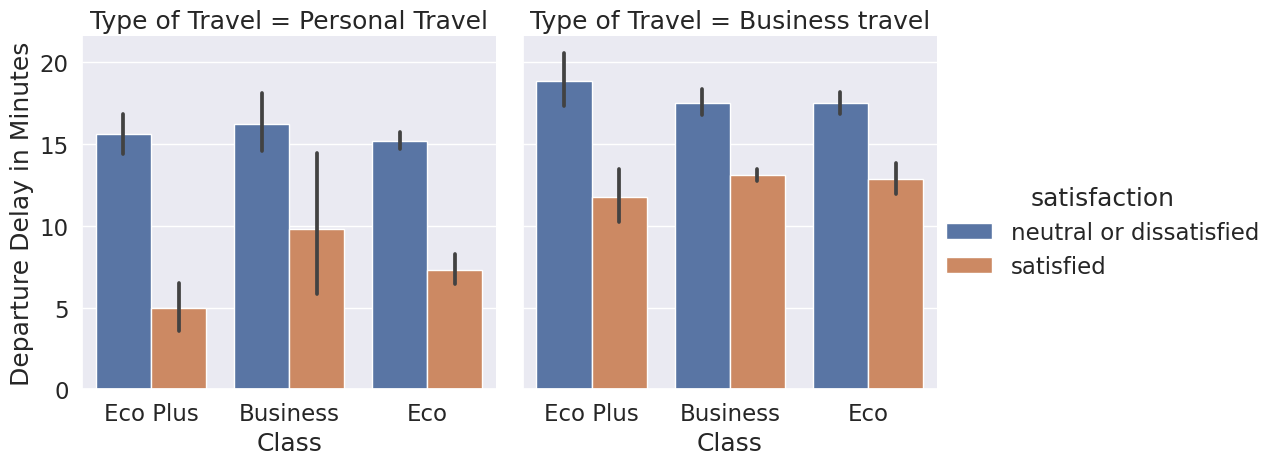

In [66]:
plt.figure(figsize=(5, 4))
sns.catplot(x="Class", y="Arrival Delay in Minutes", hue="satisfaction", col="Type of Travel", data=train, kind="bar")
sns.catplot(x="Class", y="Departure Delay in Minutes", hue="satisfaction", col="Type of Travel", data=train, kind="bar")

For both Arrival and Departure delays, all people are unhappy irrespective of which Class they are flying in.

### **4.4 Feature to feature relationship**

We make a correlation heatmap to analyze for any variables with a strong or weak correlation.

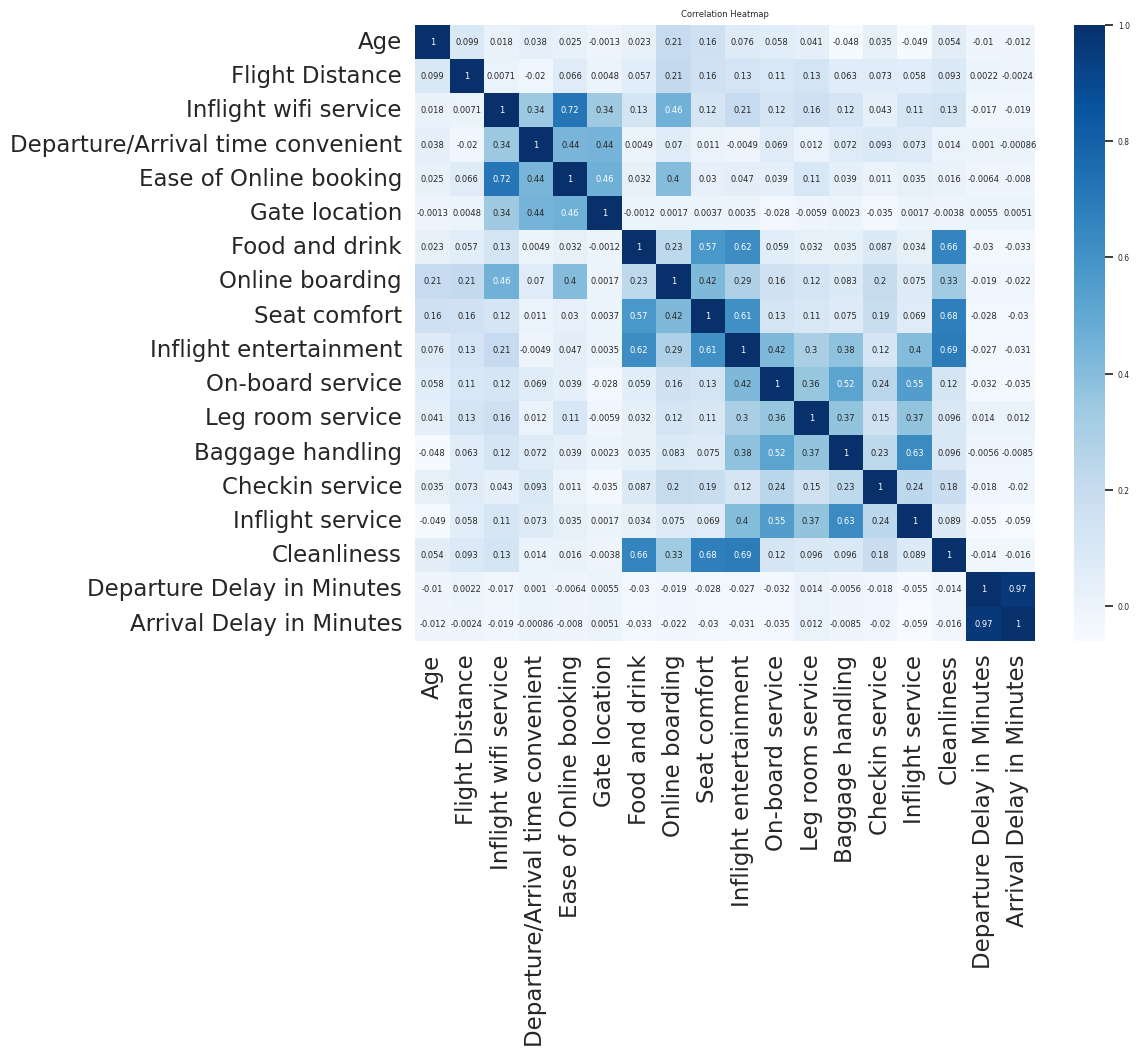

In [67]:
f, ax = plt.subplots(figsize=(10, 8))
sns.set(font_scale = 0.5)
dataplot = sns.heatmap(train.corr(), cmap="Blues", annot = True)
plt.title('Correlation Heatmap')
plt.show()

From the above Correlation Heatmap, we can see which features are strongly correlated to passenger satisfaction and which do not.

**Input variables with strong correlation:**

- Online Booking
- Class
- Inflight Entertrainment
- Seat Comfort, etc.

**Input variables with weak correlation:**

- Type of Travel
- Departure/Arrival Time Convenient
- Departure/Arrival Delay in Minutes
- Gender, etc.

##**5. Statistical Modeling**

In [68]:
## With Train set:

# Seeing columns with missing values
train.columns[train.isnull().any()]
# Filling columns missing values with median
train['Arrival Delay in Minutes'].fillna(train['Arrival Delay in Minutes'].median(), inplace = True)

# Encoding all categorical columns
train['Gender'] = train['Gender'].apply(lambda x: 1 if x == 'Female' else 0)
train['Customer Type'] = train['Customer Type'].apply(lambda x: 1 if x == 'Loyal Customer' else 0)
train['Type of Travel'] = train['Type of Travel'].apply(lambda x: 1 if x == 'Personal Travel' else 0)
train['Class'] = train['Class'].apply(lambda x: 2 if x == 'Business' else (1 if x == 'Eco Plus' else 0))
train['satisfaction'] = train['satisfaction'].apply(lambda x: 1 if x == 'satisfied' else 0)

In [69]:
## With Test set:

# Seeing columns with missing values
test.columns[train.isnull().any()]
# Filling columns missing values with median
test['Arrival Delay in Minutes'].fillna(test['Arrival Delay in Minutes'].median(), inplace = True)

# Encoding all categorical columns
test['Gender'] = test['Gender'].apply(lambda x: 1 if x == 'Female' else 0)
test['Customer Type'] = test['Customer Type'].apply(lambda x: 1 if x == 'Loyal Customer' else 0)
test['Type of Travel'] = test['Type of Travel'].apply(lambda x: 1 if x == 'Personal Travel' else 0)
test['Class'] = test['Class'].apply(lambda x: 2 if x == 'Business' else (1 if x == 'Eco Plus' else 0))
test['satisfaction'] = test['satisfaction'].apply(lambda x: 1 if x == 'satisfied' else 0)

In [70]:
# Define our input variables and target variables
inputvariables = list(train.columns)[:-1]
target = ['satisfaction']

# Splitting into test and train sets
X_train = train[inputvariables]
y_train = train[target].to_numpy()
X_test = test[inputvariables]
y_test = test[target].to_numpy()

# Normalizing features to bring all features to a common scale
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [71]:
train_corr = train.corr()['satisfaction'][:-1] # -1 because the latest row is SalePrice
golden_features_list = train_corr[abs(train_corr) > 0.5].sort_values(ascending=False)
print("There is {} strongly correlated values with satisfaction:\n{}".format(len(golden_features_list), golden_features_list))

There is 1 strongly correlated values with satisfaction:
Online boarding    0.503557
Name: satisfaction, dtype: float64


In essence, the only factor displaying a correlation with satisfaction is online boarding, albeit with a modest correlation coefficient of 0.5, signifying a relatively weak correlation.

We will try a couple of models here to see which one has the best performance.

### **1. Linear Regression**

As a baseline in conjunction with the other classification algorithms, we conduct a linear regression of the variables for the binary classification.

In [72]:
model6 = LinearRegression()
model6.fit(X_train,y_train)
y_pred = model6.predict(X_test)

# You can also calculate R-squared
r_squared = model6.score(X_test, y_test)
print(f'R-squared: {r_squared}')

# Evaluate the model using Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# accuracy score, though not reliable
accuracy_score_lin = (1 - mse / np.var(y_test)).round(4) * 100
print('Accuracy Score:', accuracy_score_lin, '%')

R-squared: 0.5484723424410416
Mean Squared Error: 0.11120079584368601
Accuracy Score: 54.85 %


### **2. Random Forest**
![](https://www.freecodecamp.org/news/content/images/2020/08/how-random-forest-classifier-work.PNG)

Accuracy Score: 96.25 %


<Figure size 800x600 with 0 Axes>

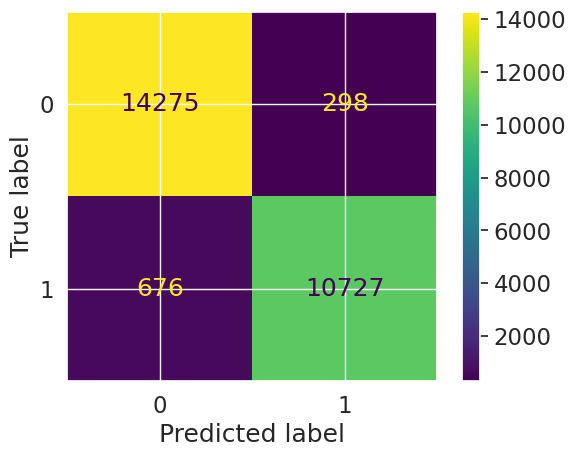

In [73]:
model1 = RandomForestClassifier()
model1.fit(X_train,y_train)
y_pred = model1.predict(X_test)
accuracy_score_rf = accuracy_score(y_test, y_pred).round(4)*100
print('Accuracy Score:', accuracy_score_rf, '%')

plt.figure(figsize=(8, 6))
sns.set(font_scale = 1.5)
cm = confusion_matrix(y_test, y_pred, labels=model1.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model1.classes_)
disp.plot()
plt.show()

### **3. XGBoost**
![](https://www.researchgate.net/publication/335483097/figure/fig3/AS:934217085100032@1599746118459/A-general-architecture-of-XGBoost.ppm)


Accuracy Score: 78.59 %


<Figure size 800x600 with 0 Axes>

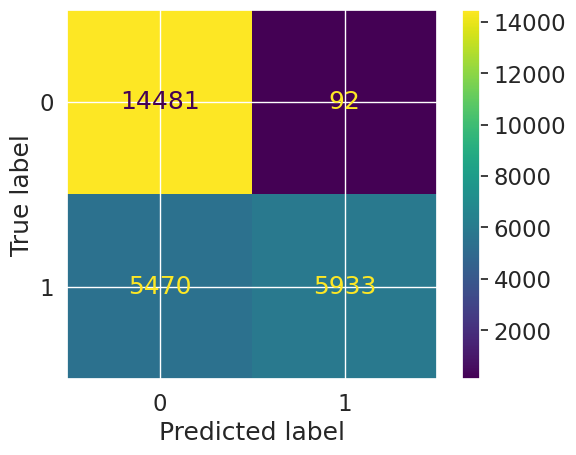

In [74]:
model2 = xgb.XGBClassifier()
model2.fit(X_train,y_train)
y_pred = model2.predict(X_test)
accuracy_score_xgb = accuracy_score(y_test, y_pred).round(4)*100
print('Accuracy Score:', accuracy_score_xgb, '%')

plt.figure(figsize=(8, 6))
sns.set(font_scale = 1.5)
cm = confusion_matrix(y_test, y_pred, labels=model1.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model1.classes_)
disp.plot()
plt.show()

### **4. KNN**
![](https://miro.medium.com/v2/resize:fit:591/1*kCqervQNQ5fGDfkFwrMzRQ.png)

Accuracy Score: 92.89 %


<Figure size 800x600 with 0 Axes>

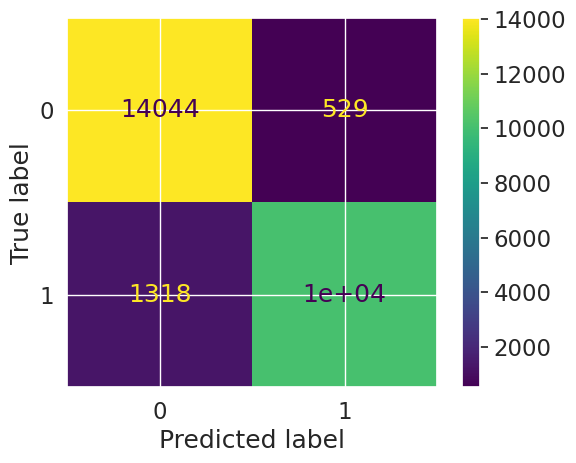

In [75]:
model3 = KNeighborsClassifier()
model3.fit(X_train,y_train)
y_pred = model3.predict(X_test)
accuracy_score_knn = accuracy_score(y_test, y_pred).round(4)*100
print('Accuracy Score:', accuracy_score_knn, '%')

plt.figure(figsize=(8, 6))
sns.set(font_scale = 1.5)
cm = confusion_matrix(y_test, y_pred, labels=model1.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model1.classes_)
disp.plot()
plt.show()

### **5. AdaBoost**
![](https://editor.analyticsvidhya.com/uploads/98218100.JPG)

Accuracy Score: 92.63 %


<Figure size 800x600 with 0 Axes>

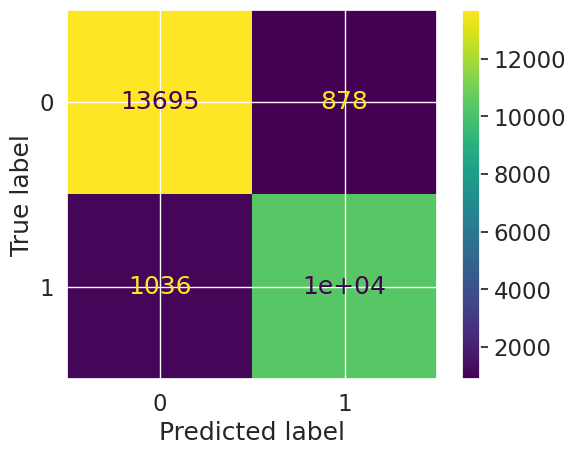

In [76]:
model4 = AdaBoostClassifier()
model4.fit(X_train,y_train)
y_pred = model4.predict(X_test)
accuracy_score_ada = accuracy_score(y_test, y_pred).round(4)*100
print('Accuracy Score:', accuracy_score_ada, '%')

plt.figure(figsize=(8, 6))
sns.set(font_scale = 1.5)
cm = confusion_matrix(y_test, y_pred, labels=model1.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model1.classes_)
disp.plot()
plt.show()

### **6. Gradient Boosting**
![](https://www.researchgate.net/publication/351542039/figure/fig1/AS:11431281172877200@1688685833363/Flow-diagram-of-gradient-boosting-machine-learning-method-The-ensemble-classifiers.png)


Accuracy Score: 94.14 %


<Figure size 800x600 with 0 Axes>

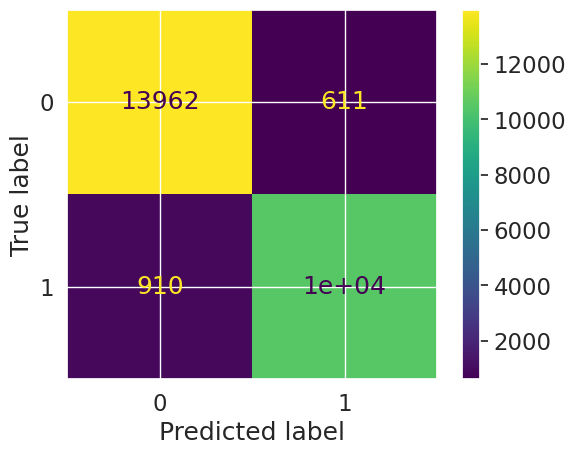

In [77]:
model5 = GradientBoostingClassifier()
model5.fit(X_train,y_train)
y_pred = model5.predict(X_test)
accuracy_score_gradientboosting = accuracy_score(y_test, y_pred).round(4)*100
print('Accuracy Score:', accuracy_score_gradientboosting, '%')

plt.figure(figsize=(8, 6))
sns.set(font_scale = 1.5)
cm = confusion_matrix(y_test, y_pred, labels=model1.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model1.classes_)
disp.plot()
plt.show()

### **Model Comparison**

In [78]:
accuracy_score = [accuracy_score_lin, accuracy_score_rf, accuracy_score_xgb, accuracy_score_knn,
                  accuracy_score_ada, accuracy_score_gradientboosting]
models = ['Linear Regression', 'Random Forest','XGBoosting','KNN','Ada Boosting', 'Gradient Boosting']

data = {'Model':models, 'Accuracy':accuracy_score}

model_table = pd.DataFrame(data)
model_table.sort_values(by=['Accuracy'], ascending=False).reset_index(drop=True)

,Model,Accuracy
0,Random Forest,96.25
1,Gradient Boosting,94.14
2,KNN,92.89
3,Ada Boosting,92.63
4,XGBoosting,78.59
5,Linear Regression,54.85


from matplotlib import pyplot as plt
_df_4['Accuracy'].plot(kind='hist', bins=20, title='Accuracy')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_5.groupby('Model').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6['Accuracy'].plot(kind='line', figsize=(8, 4), title='Accuracy')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_7['Model'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_7, x='Accuracy', y='Model', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In conclusion, the comparison of five different machine learning models and the regression model—Linear Regression, Random Forest, Gradient Boosting, KNN (K-Nearest Neighbors), AdaBoost (Adaptive Boosting), and XGBoost—revealed varying performances in predicting customer satisfaction as airline passengers in the US. After rigorous evaluation, Random Forest emerged as the most accurate model, achieving a high accuracy rate of 96.33%.

As mentioned, the linear regression model was conducted to be a baseline for our classification prediction. With the 54.85% accuracy and r-squared of 0.5485, this indicates that a linear regression is not a good fit for prediction. Only 54.85% of the variance in the dependent variables can be explained by the independent variable, which is small for our prediction model.

While Random Forest had the highest accuracy percentage, Gradient Boosting, KNN and Ada Boosting also have high accuracy percentages at 94.14%, 92.89%, and 92.63% respectively. This follows as Gradient Boosting and Ada Boost are within the same family of boosting algorithms, showcased strong performances, underlining the effectiveness of boosting techniques in improving model accuracy. KNN, with its instance-based learning approach, also demonstrated competence, although it fell slightly behind in accuracy compared to Random Forest or Gradient Boost. As for the XG Boosting, due to its very low accuracy at 78.59% in comparison to the other models, we can surmise that potentially due to the extreme gradient boosting could have overdone the prediction and caused for such a low accuracy.